# The Impact of Social Media on Mental Health and Emotional Well-Being

Recap Of Data Science Problem

The purpose of this project is to investigate the correlation between the amount of time individuals spend on
social media and its effects on their mental health and emotional well-being over the next six
month. Specifically, it will predict the dominant emotions experienced by users and analyze
survey data to identify patterns and clusters related to mental health risks.

#Part 1: Kaggle Social Media Usage and Emotional Well-Being Dataset: Ideal for predicting the dominant emotion, with better results achievable by grouping emotions into positive, negative, or neutral categories.

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix,  accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [6]:
#CSV data file 
SM_data = pd.read_csv(r'C:\Users\omnia\Google Drive\Springboard\Capstone 2\train.csv')
SM_data.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [7]:
SM_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB


In [8]:
# Identify affected rows (250-288 and 751-788)
affected_rows_1 = range(250, 288)
affected_rows_2 = range(751, 789)

In [9]:
# Inspect the affected rows
print(SM_data.loc[affected_rows_1, ['Gender', 'Age']])
print(SM_data.loc[affected_rows_2, ['Gender', 'Age']])

    Gender         Age
250     27        Male
251     24      Female
252     29  Non-binary
253     33      Female
254     31        Male
255     22      Female
256     25        Male
257     29  Non-binary
258     28      Female
259     27        Male
260     30      Female
261     23        Male
262     34  Non-binary
263     26      Female
264     25        Male
265     29  Non-binary
266     28        Male
267     31      Female
268     27        Male
269     22  Non-binary
270     24      Female
271     35        Male
272     21  Non-binary
273     29      Female
274     25        Male
275     28  Non-binary
276     32      Female
277     26        Male
278     33  Non-binary
279     27      Female
280     31        Male
281     24  Non-binary
282     34      Female
283     22        Male
284     29  Non-binary
285     28      Female
286     31        Male
287     21  Non-binary
    Gender         Age
751     27        Male
752     24      Female
753     29  Non-binary
754     33 

In [10]:
# Switche the 'Gender' and 'Age' columns for these rows
SM_data.loc[affected_rows_1, ['Gender', 'Age']] = SM_data.loc[affected_rows_1, ['Age', 'Gender']].values
SM_data.loc[affected_rows_2, ['Gender', 'Age']] = SM_data.loc[affected_rows_2, ['Age', 'Gender']].values

In [11]:
# Convert Gender to categorical and Age to numeric
SM_data['Gender'] = SM_data['Gender'].astype('category')
SM_data['Age'] = pd.to_numeric(SM_data['Age'], errors='coerce')

In [12]:
# Verify the corrections
print(SM_data.loc[affected_rows_1, ['Gender', 'Age']])
print(SM_data.loc[affected_rows_2, ['Gender', 'Age']])

         Gender   Age
250        Male  27.0
251      Female  24.0
252  Non-binary  29.0
253      Female  33.0
254        Male  31.0
255      Female  22.0
256        Male  25.0
257  Non-binary  29.0
258      Female  28.0
259        Male  27.0
260      Female  30.0
261        Male  23.0
262  Non-binary  34.0
263      Female  26.0
264        Male  25.0
265  Non-binary  29.0
266        Male  28.0
267      Female  31.0
268        Male  27.0
269  Non-binary  22.0
270      Female  24.0
271        Male  35.0
272  Non-binary  21.0
273      Female  29.0
274        Male  25.0
275  Non-binary  28.0
276      Female  32.0
277        Male  26.0
278  Non-binary  33.0
279      Female  27.0
280        Male  31.0
281  Non-binary  24.0
282      Female  34.0
283        Male  22.0
284  Non-binary  29.0
285      Female  28.0
286        Male  31.0
287  Non-binary  21.0
         Gender   Age
751        Male  27.0
752      Female  24.0
753  Non-binary  29.0
754      Female  33.0
755        Male  31.0
756      F

In [13]:
#Handel missing data
missing = pd.concat([SM_data.isnull().sum(), 100 * SM_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Age,1,0.0999
Gender,1,0.0999
Platform,1,0.0999
Daily_Usage_Time (minutes),1,0.0999
Posts_Per_Day,1,0.0999
Likes_Received_Per_Day,1,0.0999
Comments_Received_Per_Day,1,0.0999
Messages_Sent_Per_Day,1,0.0999
Dominant_Emotion,1,0.0999
User_ID,0,0.0000


In [14]:
# Find rows where 'Age' is missing
missing_age_rows = SM_data[SM_data['Age'].isnull()]

# Display the rows with missing 'Age' values
print(missing_age_rows)


    User_ID  Age Gender Platform  Daily_Usage_Time (minutes)  Posts_Per_Day  \
641   Tabii  NaN    NaN      NaN                         NaN            NaN   

     Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
641                     NaN                        NaN                    NaN   

    Dominant_Emotion  
641              NaN  


In [15]:
#Drop rows with missing data
SM_data = SM_data.dropna()

In [16]:
# Check for duplicate rows
duplicates = SM_data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [17]:
SM_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   User_ID                     1000 non-null   object  
 1   Age                         1000 non-null   float64 
 2   Gender                      1000 non-null   category
 3   Platform                    1000 non-null   object  
 4   Daily_Usage_Time (minutes)  1000 non-null   float64 
 5   Posts_Per_Day               1000 non-null   float64 
 6   Likes_Received_Per_Day      1000 non-null   float64 
 7   Comments_Received_Per_Day   1000 non-null   float64 
 8   Messages_Sent_Per_Day       1000 non-null   float64 
 9   Dominant_Emotion            1000 non-null   object  
dtypes: category(1), float64(6), object(3)
memory usage: 79.2+ KB


In [18]:
# Convert all float columns to integers
float_cols = SM_data.select_dtypes(include=['float']).columns
SM_data[float_cols] = SM_data[float_cols].astype(int)
SM_data.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom


In [19]:
# Print unique values for important columns
print("Unique platforms:")
print(SM_data['Platform'].unique())

Unique platforms:
['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']


In [20]:
print("Unique Dominant_Emotion:")
print(SM_data['Dominant_Emotion'].unique())

Unique Dominant_Emotion:
['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness']


In [21]:
print("Unique Gender:")
print(SM_data['Gender'].unique())

Unique Gender:
['Female', 'Male', 'Non-binary']
Categories (3, object): ['Female', 'Male', 'Non-binary']


In [22]:
# Summary statistics for Age and Daily_Usage_Time
print(SM_data[['Age', 'Daily_Usage_Time (minutes)']].describe())

               Age  Daily_Usage_Time (minutes)
count  1000.000000                 1000.000000
mean     27.510000                   95.950000
std       3.930057                   38.850442
min      21.000000                   40.000000
25%      24.000000                   65.000000
50%      27.500000                   85.000000
75%      30.250000                  120.000000
max      35.000000                  200.000000


In [23]:
# Count of each platform and emotion
print(SM_data['Platform'].value_counts())

Platform
Instagram    250
Twitter      200
Facebook     190
LinkedIn     120
Whatsapp      80
Telegram      80
Snapchat      80
Name: count, dtype: int64


In [24]:
print(SM_data['Dominant_Emotion'].value_counts())

Dominant_Emotion
Happiness    200
Neutral      200
Anxiety      170
Sadness      160
Boredom      140
Anger        130
Name: count, dtype: int64


In [25]:
print(SM_data['Gender'].value_counts())

Gender
Female        370
Male          360
Non-binary    270
Name: count, dtype: int64


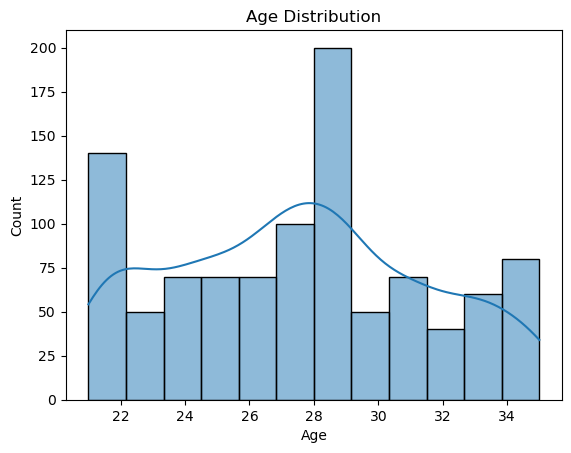

In [26]:
# Plot distribution of Age
sns.histplot(SM_data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

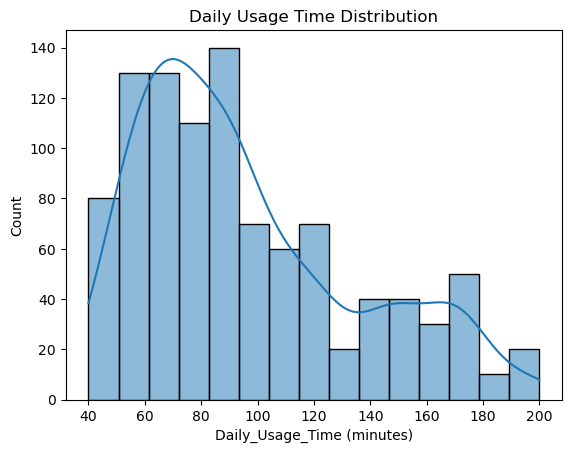

In [27]:
# Plot distribution of Daily Usage Time
sns.histplot(SM_data['Daily_Usage_Time (minutes)'], kde=True)
plt.title('Daily Usage Time Distribution')
plt.show()

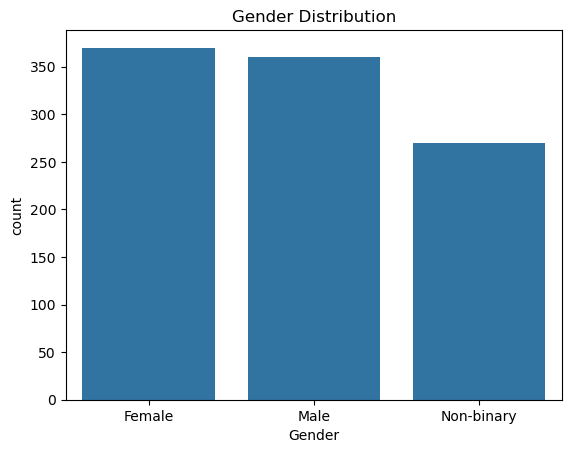

In [28]:
# Plot distribution of Gender
sns.countplot(x='Gender', data=SM_data)
plt.title('Gender Distribution')
plt.show()

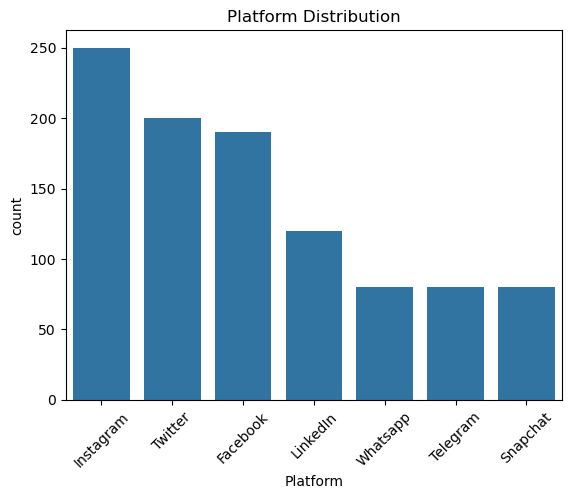

In [29]:
# Plot distribution of Platform usage
sns.countplot(x='Platform', data=SM_data)
plt.title('Platform Distribution')
plt.xticks(rotation=45)
plt.show()

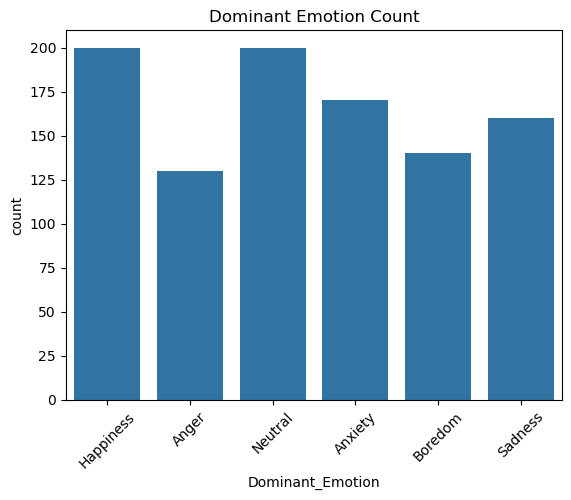

In [30]:
# Plot distribution for Dominant Emotion
sns.countplot(data=SM_data, x='Dominant_Emotion')
plt.title('Dominant Emotion Count')
plt.xticks(rotation=45)
plt.show()

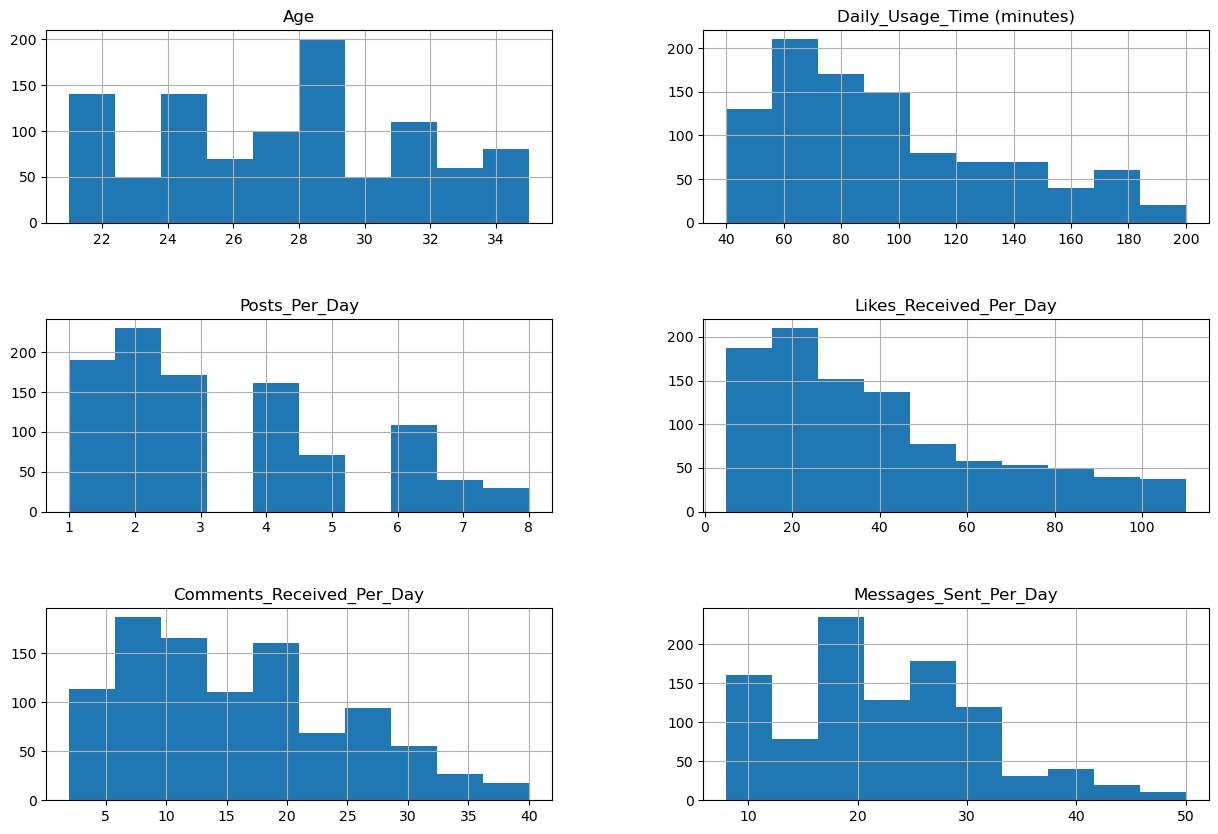

In [31]:
# Histogram for all numeric columns
SM_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [32]:
# Define the mapping from specific emotions to broader categories
emotion_mapping = {
    'Happiness': 'Positive',
    'Anger': 'Negative',
    'Neutral': 'Neutral',
    'Anxiety': 'Negative',
    'Boredom': 'Negative',
    'Sadness': 'Negative'
}

In [33]:
# Create a new column for Emotion_Category
SM_data['Emotion_Category'] = SM_data['Dominant_Emotion'].map(emotion_mapping)

In [34]:
# Encode Emotion_Category using LabelEncoder
label_encoder_emotion = LabelEncoder()
SM_data['Emotion_Category'] = label_encoder_emotion.fit_transform(SM_data['Emotion_Category'])

In [35]:
label_encoder_gender = LabelEncoder()
SM_data['Gender_encoded'] = label_encoder_gender.fit_transform(SM_data['Gender'])

In [36]:
# Map encoded Emotion_Category back to labels for plotting
SM_data['Emotion_Label'] = SM_data['Emotion_Category'].map(lambda x: label_encoder_emotion.inverse_transform([x])[0])

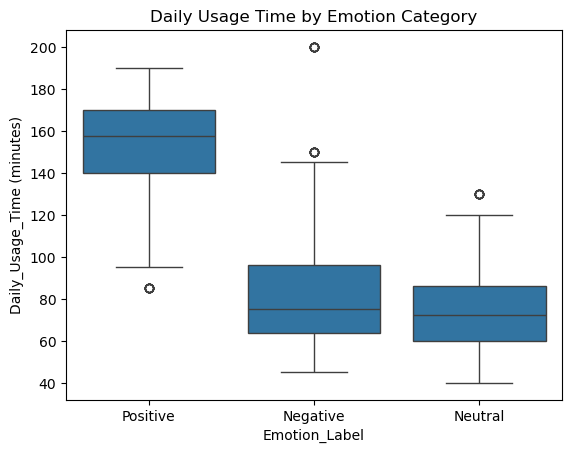

In [37]:
# Boxplot of Daily Usage Time by Emotion Category
sns.boxplot(x='Emotion_Label', y='Daily_Usage_Time (minutes)', data=SM_data)
plt.title('Daily Usage Time by Emotion Category')
plt.show()

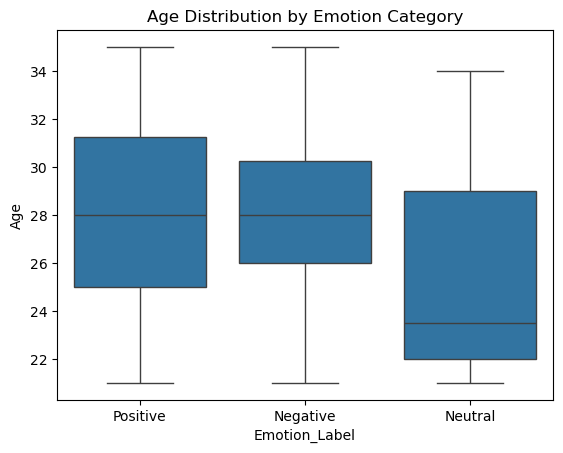

In [38]:
# Distribution of Age by Emotion Category
sns.boxplot(x='Emotion_Label', y='Age', data=SM_data)
plt.title('Age Distribution by Emotion Category')
plt.show()

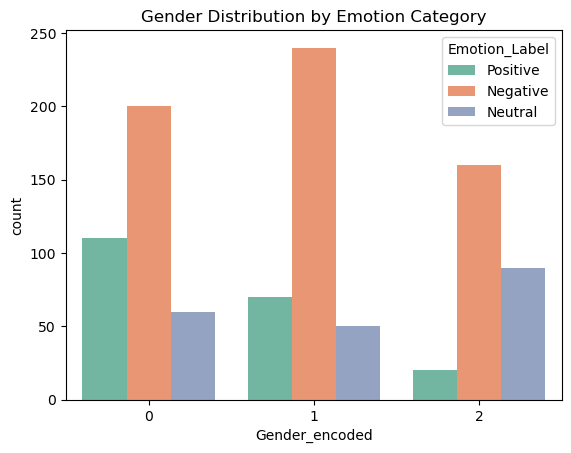

In [39]:
# Countplot of Gender by Emotion Category using the encoded column
sns.countplot(x='Gender_encoded', hue='Emotion_Label', data=SM_data, palette='Set2')
plt.title('Gender Distribution by Emotion Category')
plt.show()

In [40]:
SM_data = pd.get_dummies(SM_data, columns=['Platform'], drop_first=True)

C:\Users\omnia\AppData\Local\Temp\ipykernel_34500\693032403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotion_Label', y=platform, data=platform_usage, palette='Set2')


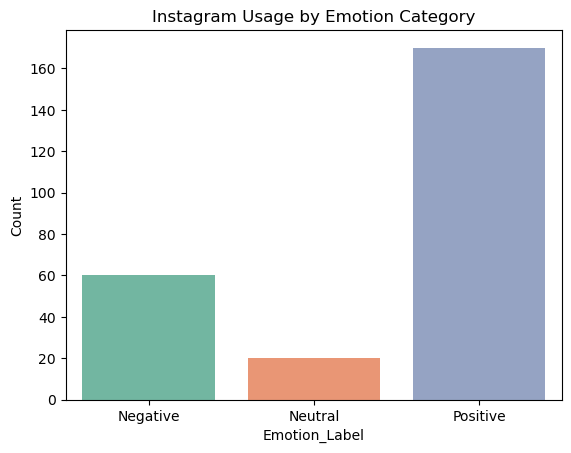

C:\Users\omnia\AppData\Local\Temp\ipykernel_34500\693032403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotion_Label', y=platform, data=platform_usage, palette='Set2')


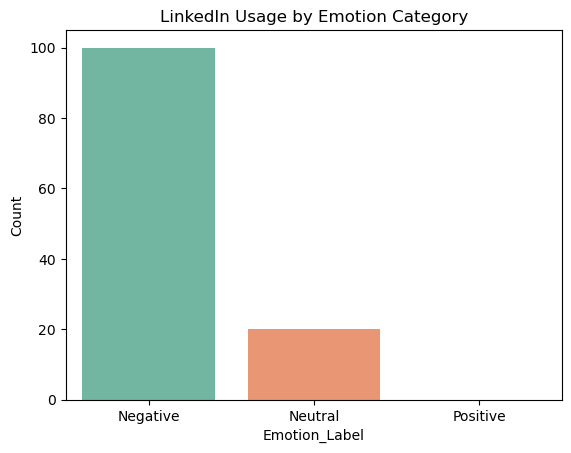

C:\Users\omnia\AppData\Local\Temp\ipykernel_34500\693032403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotion_Label', y=platform, data=platform_usage, palette='Set2')


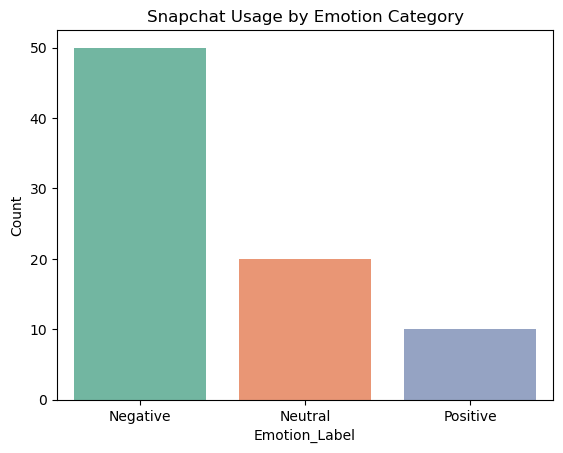

C:\Users\omnia\AppData\Local\Temp\ipykernel_34500\693032403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotion_Label', y=platform, data=platform_usage, palette='Set2')


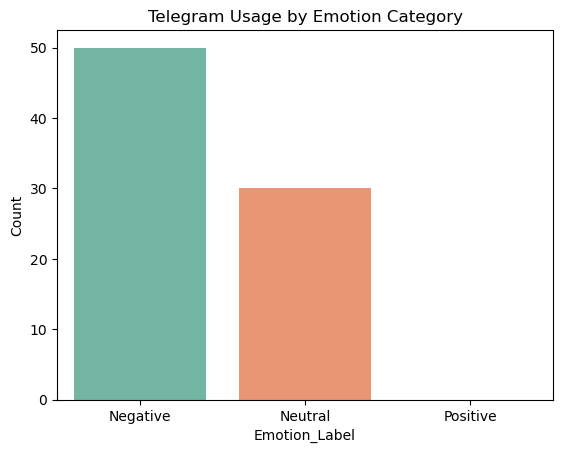

C:\Users\omnia\AppData\Local\Temp\ipykernel_34500\693032403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotion_Label', y=platform, data=platform_usage, palette='Set2')


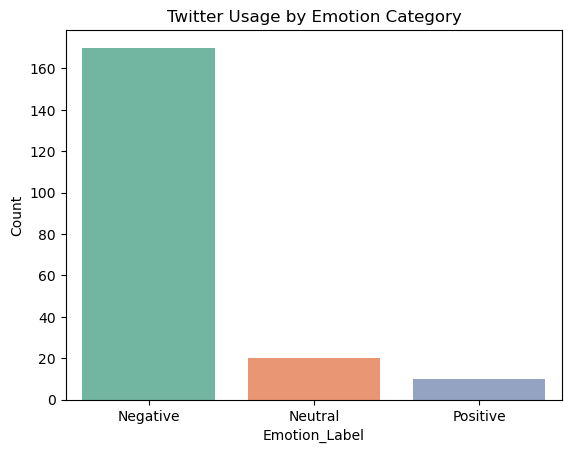

C:\Users\omnia\AppData\Local\Temp\ipykernel_34500\693032403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotion_Label', y=platform, data=platform_usage, palette='Set2')


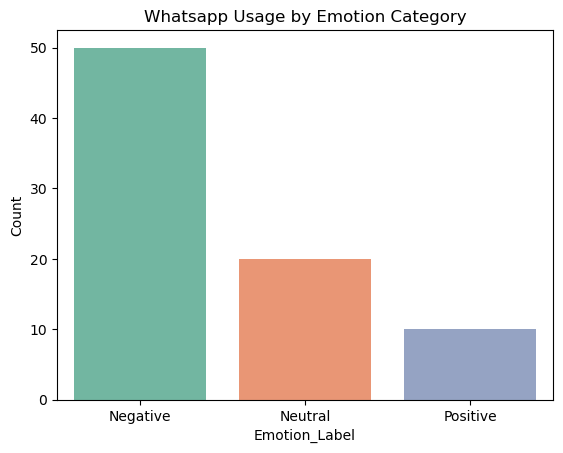

In [41]:
# Plot Platform usage by Emotion Category
platform_columns = [col for col in SM_data.columns if 'Platform_' in col]
for platform in platform_columns:
        platform_usage = SM_data.groupby('Emotion_Label')[platform].sum().reset_index()
        sns.barplot(x='Emotion_Label', y=platform, data=platform_usage, palette='Set2')
        plt.title(f'{platform.replace("Platform_", "")} Usage by Emotion Category')
        plt.ylabel('Count')
        plt.show()

In [42]:
# Create a mapping dictionary from the encoded integers to the emotion labels
emotion_mapping = dict(enumerate(label_encoder_emotion.classes_))

SM_data['Emotion_Label'] = SM_data['Emotion_Category'].map(lambda x: emotion_mapping[int(x)])

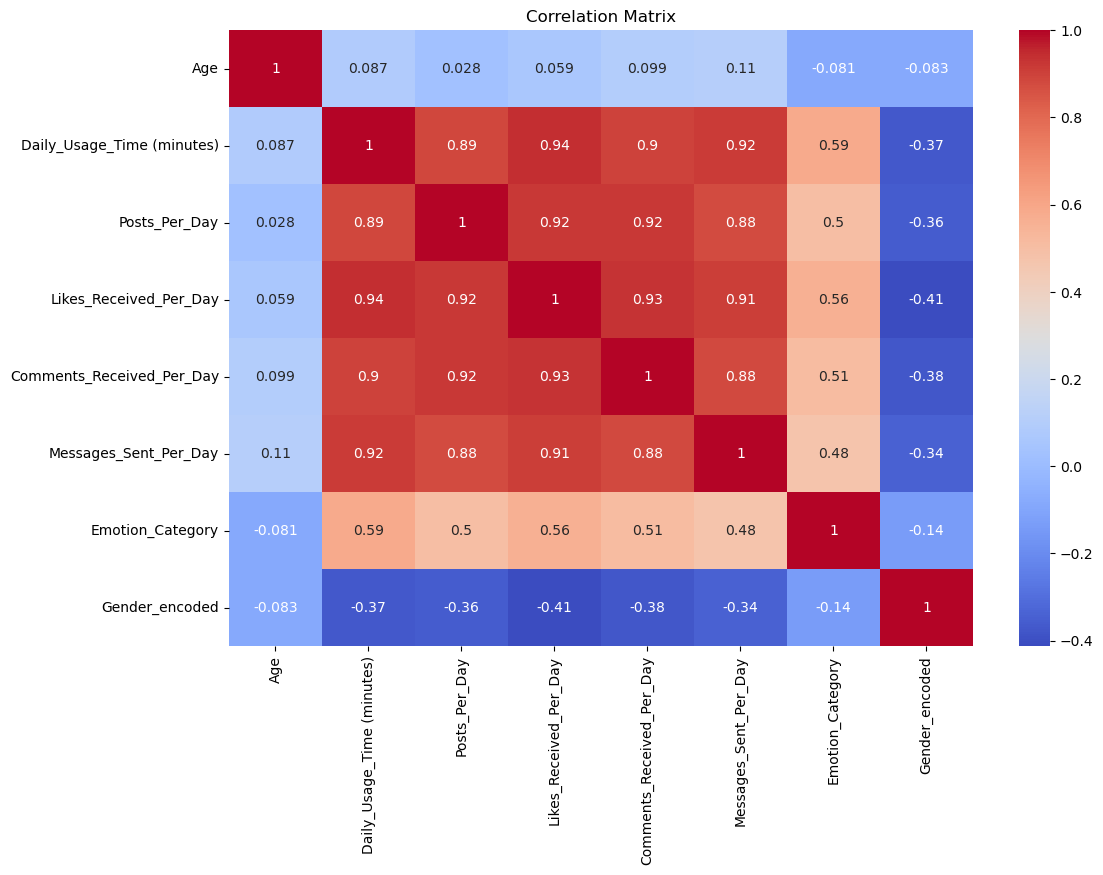

In [43]:
# Correlation Analysis
numerical_data = SM_data.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [44]:
#Correlation Analysis
correlation_columns = ['Age', 'Gender_encoded', 'Daily_Usage_Time (minutes)', 'Emotion_Category'] + platform_columns
correlation_data = SM_data[correlation_columns]

In [45]:
correlation_matrix = correlation_data.corr()

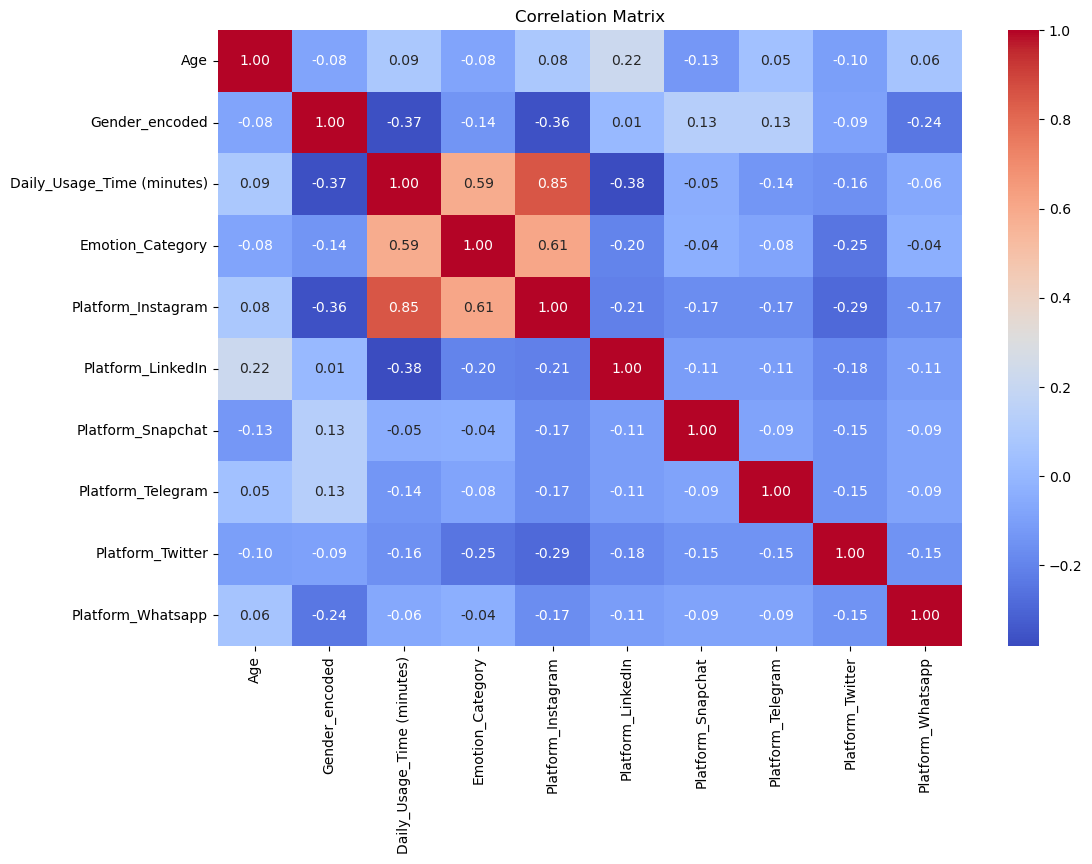

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

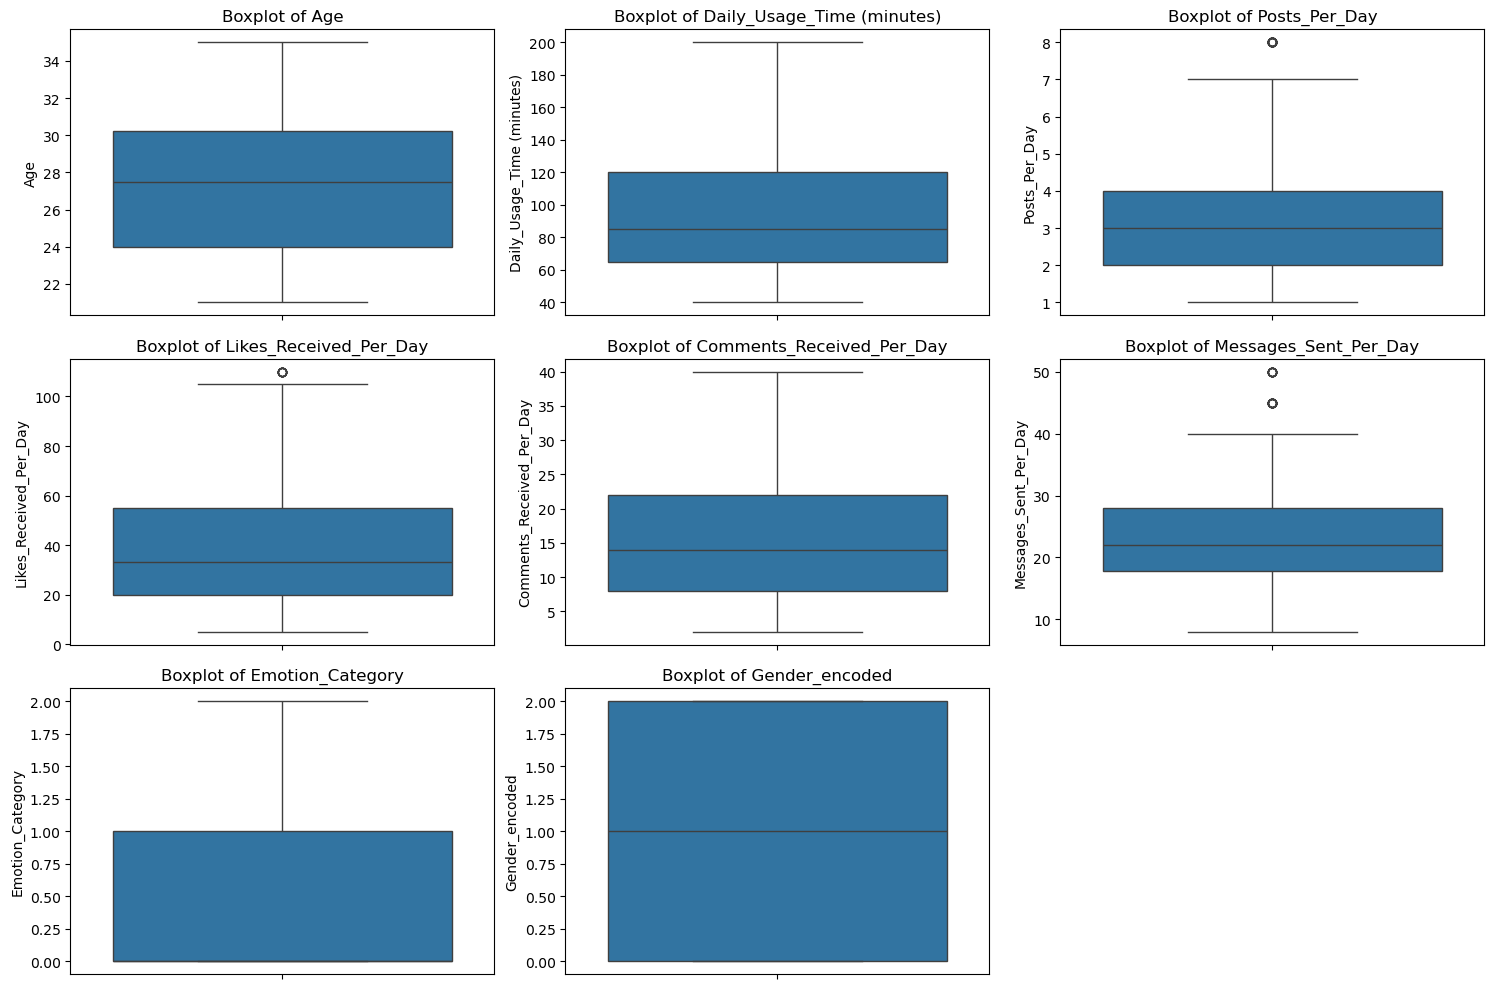

In [47]:
# Plot boxplots for all numeric columns to identify outliers
numeric_columns = SM_data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(y=SM_data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [48]:
#Identify Outliers Using the IQR Method
def find_outliers_IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

In [49]:
outliers = {}
for column in numeric_columns:
    outliers[column] = find_outliers_IQR(SM_data[column])

In [50]:
# Print outliers
for column, outlier_values in outliers.items():
    if not outlier_values.empty:
        print(f'Outliers in {column}:')
        print(outlier_values)

Outliers in Posts_Per_Day:
3      8
23     8
103    8
113    8
123    8
203    8
213    8
223    8
303    8
313    8
323    8
403    8
413    8
423    8
503    8
513    8
523    8
603    8
613    8
623    8
704    8
714    8
724    8
804    8
814    8
824    8
904    8
914    8
924    8
Name: Posts_Per_Day, dtype: int32
Outliers in Likes_Received_Per_Day:
103    110
203    110
303    110
403    110
503    110
603    110
704    110
804    110
904    110
Name: Likes_Received_Per_Day, dtype: int32
Outliers in Messages_Sent_Per_Day:
3      50
23     45
103    45
113    45
123    50
203    45
213    45
223    50
303    45
313    45
323    50
403    45
413    45
423    50
503    45
513    45
523    50
603    45
613    45
623    50
704    45
714    45
724    50
804    45
814    45
824    50
904    45
914    45
924    50
Name: Messages_Sent_Per_Day, dtype: int32


At this stage of data wrangling, our primary focus is on analyzing the correlation between the amount of time individuals spend on social media and the dominant emotions they experience. Given that these outliers represent valid extremes in user behavior, we believe they could offer valuable insights and should not be disregarded at this point. Therefore, we will retain these outliers in our dataset, as they may prove crucial for future research and deeper analysis.

In [52]:
# Save the cleaned dataset
SM_data.to_csv('cleaned_SM_data.csv', index=False)

# Exploratory Data Analysis (EDA)


In [54]:
SM_data = pd.read_csv(r"C:\Users\omnia\Google Drive\Springboard\Capstone 2\cleaned_SM_data.csv")
SM_data.head()

,User_ID,Age,Gender,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Emotion_Category,Gender_encoded,Emotion_Label,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,1,25,Female,120,3,45,10,12,Happiness,2,0,Positive,True,False,False,False,False,False
1,2,30,Male,90,5,20,25,30,Anger,0,1,Negative,False,False,False,False,True,False
2,3,22,Non-binary,60,2,15,5,20,Neutral,1,2,Neutral,False,False,False,False,False,False
3,4,28,Female,200,8,100,30,50,Anxiety,0,0,Negative,True,False,False,False,False,False
4,5,33,Male,45,1,5,2,10,Boredom,0,1,Negative,False,True,False,False,False,False


In [55]:
SM_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     1000 non-null   int64 
 1   Age                         1000 non-null   int64 
 2   Gender                      1000 non-null   object
 3   Daily_Usage_Time (minutes)  1000 non-null   int64 
 4   Posts_Per_Day               1000 non-null   int64 
 5   Likes_Received_Per_Day      1000 non-null   int64 
 6   Comments_Received_Per_Day   1000 non-null   int64 
 7   Messages_Sent_Per_Day       1000 non-null   int64 
 8   Dominant_Emotion            1000 non-null   object
 9   Emotion_Category            1000 non-null   int64 
 10  Gender_encoded              1000 non-null   int64 
 11  Emotion_Label               1000 non-null   object
 12  Platform_Instagram          1000 non-null   bool  
 13  Platform_LinkedIn           1000 non-null   bool 

In [56]:
SM_data.describe()

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Emotion_Category,Gender_encoded
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000
mean,500.500000,27.510000,95.950000,3.321000,39.898000,15.611000,22.560000,0.6000,0.900000
std,288.819436,3.930057,38.850442,1.914582,26.393867,8.819493,8.516274,0.8004,0.794123
min,1.000000,21.000000,40.000000,1.000000,5.000000,2.000000,8.000000,0.0000,0.000000
25%,250.750000,24.000000,65.000000,2.000000,20.000000,8.000000,17.750000,0.0000,0.000000
50%,500.500000,27.500000,85.000000,3.000000,33.000000,14.000000,22.000000,0.0000,1.000000
75%,750.250000,30.250000,120.000000,4.000000,55.000000,22.000000,28.000000,1.0000,2.000000
max,1000.000000,35.000000,200.000000,8.000000,110.000000,40.000000,50.000000,2.0000,2.000000


In [57]:
# Distribution of categorical data
print(SM_data['Gender'].value_counts())
print(SM_data['Emotion_Label'].value_counts())

Gender
Female        370
Male          360
Non-binary    270
Name: count, dtype: int64
Emotion_Label
Negative    600
Positive    200
Neutral     200
Name: count, dtype: int64


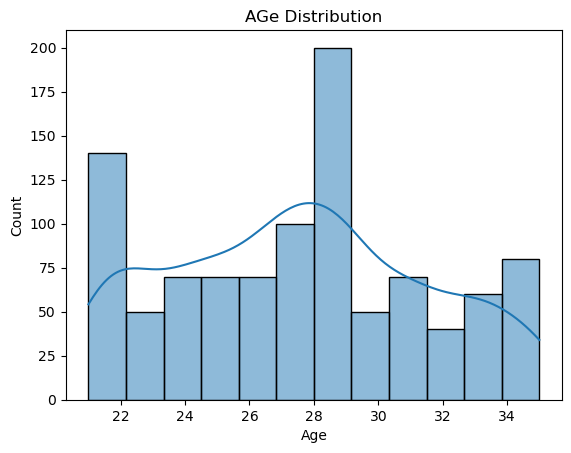

In [58]:
# Visualizations
sns.histplot(SM_data['Age'], kde=True)
plt.title('AGe Distribution')
plt.show()

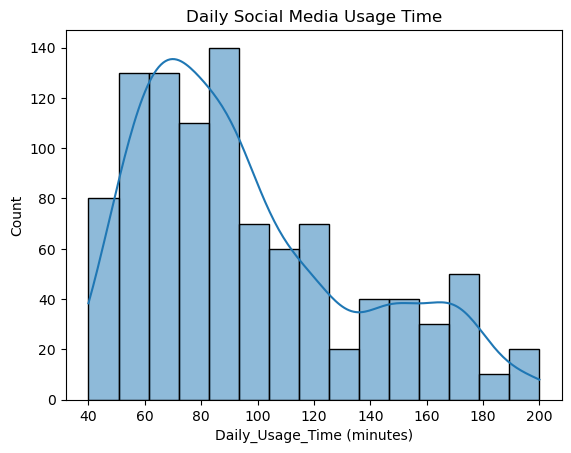

In [59]:
sns.histplot(SM_data['Daily_Usage_Time (minutes)'], kde=True)
plt.title('Daily Social Media Usage Time')
plt.show()

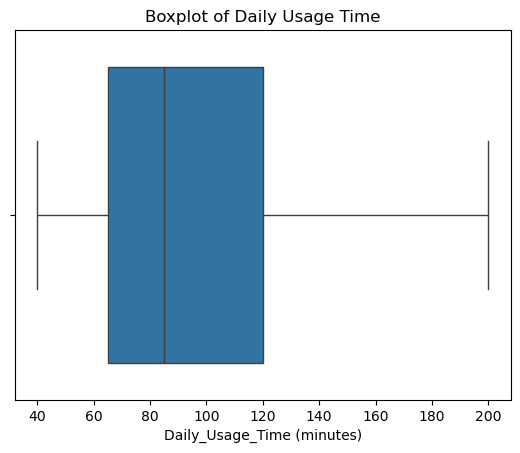

In [60]:
sns.boxplot(x=SM_data['Daily_Usage_Time (minutes)'])
plt.title('Boxplot of Daily Usage Time')
plt.show()

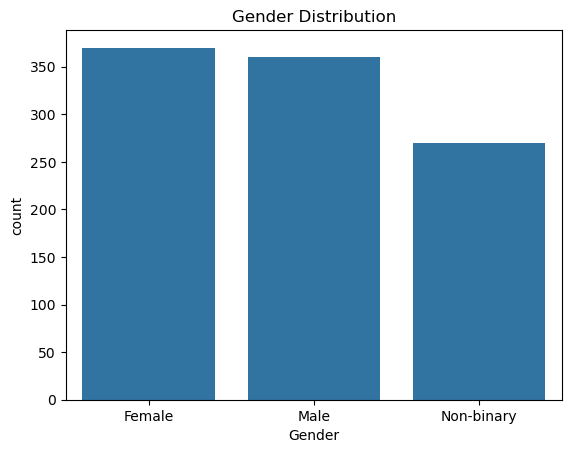

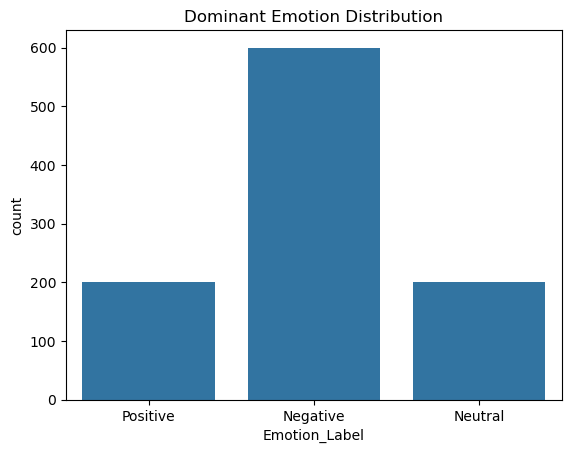

In [61]:
sns.countplot(x='Gender', data=SM_data)
plt.title('Gender Distribution')
plt.show()

sns.countplot(x='Emotion_Label', data=SM_data)
plt.title('Dominant Emotion Distribution')
plt.show()

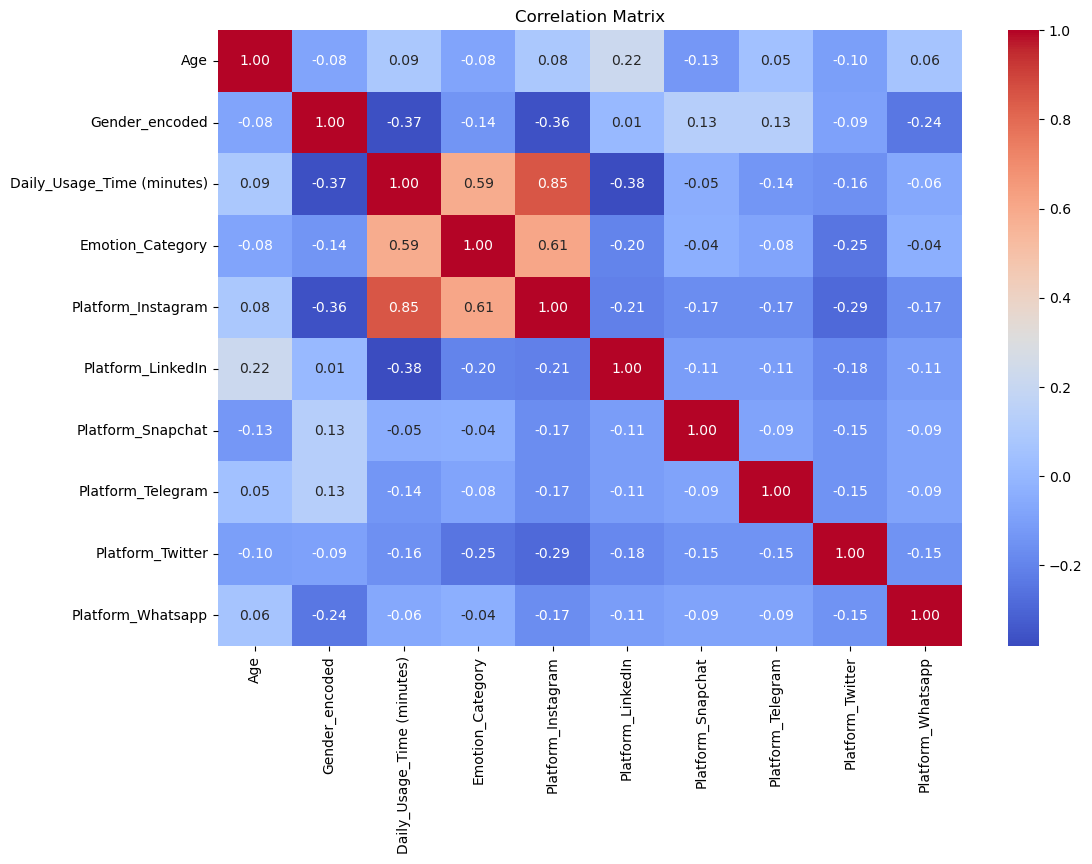

In [62]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Given that the null hypothesis is that "Social media improves mental health and emotional well-being", we will test whether the data supports or refutes this hypothesis using statistical analysis.

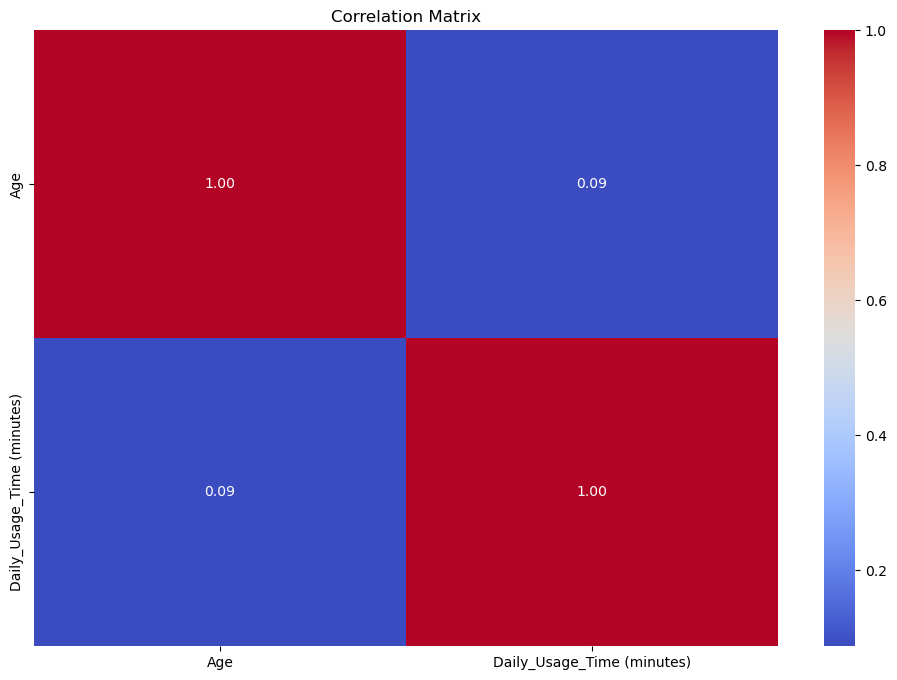

In [64]:
plt.figure(figsize=(12, 8))
sns.heatmap(SM_data[['Age', 'Daily_Usage_Time (minutes)']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

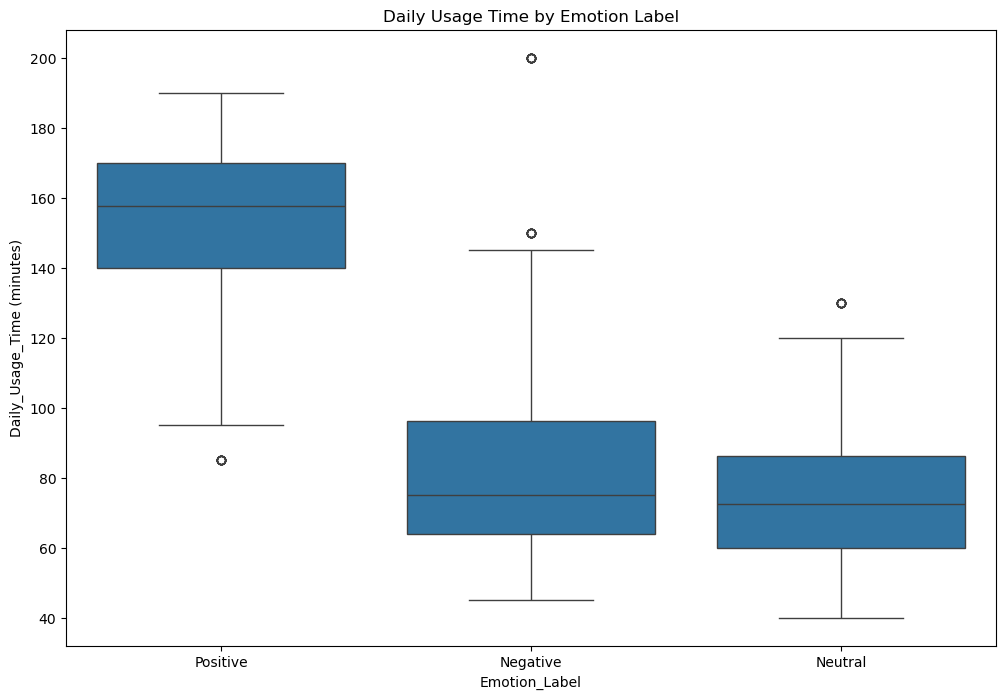

In [65]:
# Relationship between Emotion_Label and Daily Usage Time
plt.figure(figsize=(12, 8))
sns.boxplot(x='Emotion_Label', y='Daily_Usage_Time (minutes)', data=SM_data)
plt.title('Daily Usage Time by Emotion Label')
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

In [67]:
label_encoder = LabelEncoder()

# Fit and transform the labels to numeric
SM_data['Emotion_Label_Encoded'] = label_encoder.fit_transform(SM_data['Emotion_Label'])

# Check the mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'Negative': 0, 'Neutral': 1, 'Positive': 2}


In [68]:
# Logistic Regression
X = SM_data[['Age', 'Daily_Usage_Time (minutes)']]
y = SM_data['Emotion_Label_Encoded']

# Splitting the dataset into the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Accuracy: 0.7766666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.95      0.84       182
           1       1.00      0.14      0.25        56
           2       0.85      0.84      0.85        62

    accuracy                           0.78       300
   macro avg       0.87      0.64      0.64       300
weighted avg       0.82      0.78      0.73       300

Mean Squared Error: 0.41333333333333333


In [69]:
from scipy.stats import chi2_contingency

# Create a contingency table
platform_columns = ['Platform_Instagram', 'Platform_LinkedIn', 'Platform_Snapchat', 
                    'Platform_Telegram', 'Platform_Twitter', 'Platform_Whatsapp']

for platform in platform_columns:
    contingency_table = pd.crosstab(SM_data['Emotion_Label'], SM_data[platform])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print("Chi-square test result:", p)

Chi-square test result: 5.8792826982452315e-105
Chi-square test result: 1.6841241475505996e-09
Chi-square test result: 0.16339344675507977
Chi-square test result: 2.0534985048598463e-07
Chi-square test result: 3.338237795365026e-15
Chi-square test result: 0.16339344675507977


In [70]:
contingency_table = pd.crosstab(SM_data['Emotion_Label'], SM_data['Platform_Instagram'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("P-value for association between Emotion_Label and Platform_Instagram:", p_value)

P-value for association between Emotion_Label and Platform_Instagram: 5.8792826982452315e-105


The p-value you obtained, 5.879×10 −105, is extremely small, which suggests that there is a statistically significant association between the Emotion_Label and the usage of Instagram (Platform_Instagram). This means that the differences in emotion labels across different usage levels of Instagram are not likely due to random chance.

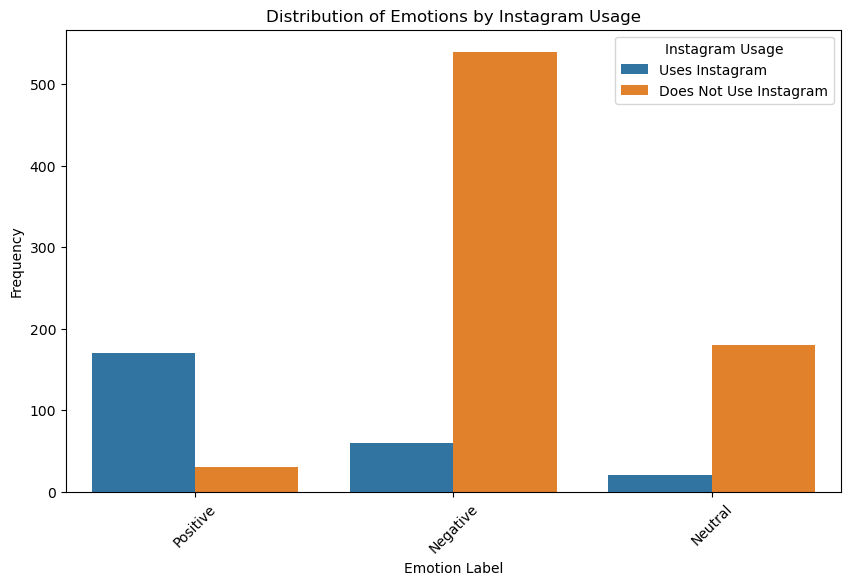

In [72]:
SM_data['Instagram_Usage'] = SM_data['Platform_Instagram'].apply(lambda x: 'Uses Instagram' if x == 1 else 'Does Not Use Instagram')

plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion_Label', hue='Instagram_Usage', data=SM_data)
plt.title('Distribution of Emotions by Instagram Usage')
plt.xlabel('Emotion Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Instagram Usage')
plt.show()

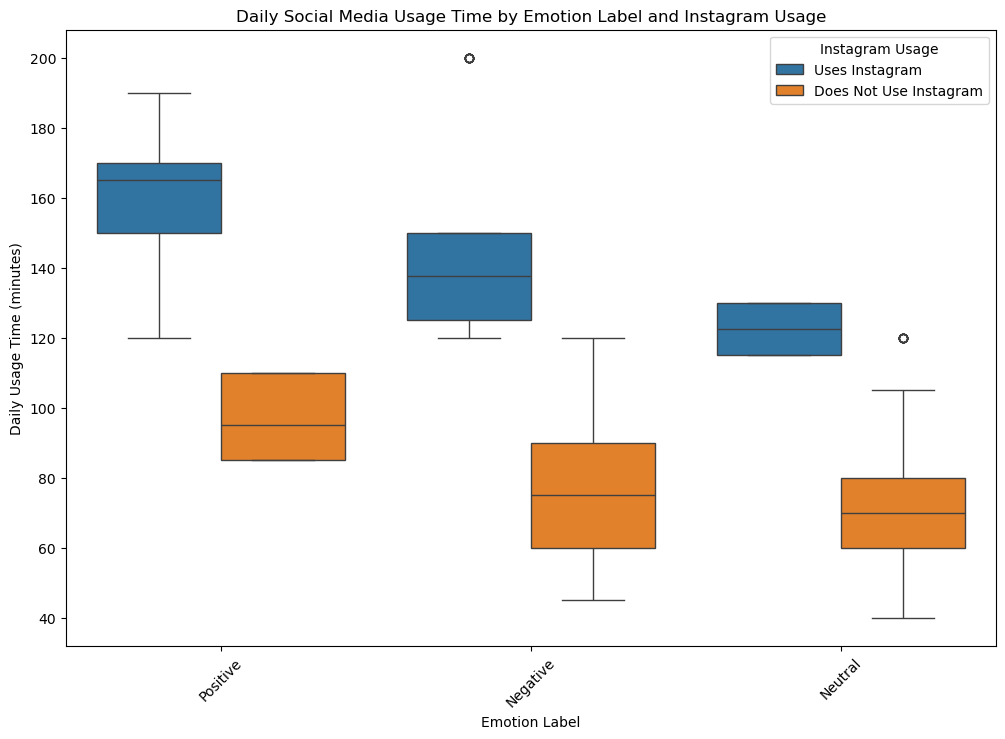

In [73]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Emotion_Label', y='Daily_Usage_Time (minutes)', hue='Instagram_Usage', data=SM_data)
plt.title('Daily Social Media Usage Time by Emotion Label and Instagram Usage')
plt.xlabel('Emotion Label')
plt.ylabel('Daily Usage Time (minutes)')
plt.xticks(rotation=45)
plt.legend(title='Instagram Usage')
plt.show()

In [74]:
grouped_data = SM_data.groupby(['Emotion_Label', 'Instagram_Usage'])
summary_stats = grouped_data['Daily_Usage_Time (minutes)'].describe()
print(summary_stats)

                                      count        mean        std    min  \
Emotion_Label Instagram_Usage                                               
Negative      Does Not Use Instagram  540.0   77.037037  19.275334   45.0   
              Uses Instagram           60.0  145.000000  26.996547  120.0   
Neutral       Does Not Use Instagram  180.0   72.777778  19.072211   40.0   
              Uses Instagram           20.0  122.500000   7.694838  115.0   
Positive      Does Not Use Instagram   30.0   96.666667  10.449660   85.0   
              Uses Instagram          170.0  160.000000  17.114304  120.0   

                                        25%    50%    75%    max  
Emotion_Label Instagram_Usage                                     
Negative      Does Not Use Instagram   60.0   75.0   90.0  120.0  
              Uses Instagram          125.0  137.5  150.0  200.0  
Neutral       Does Not Use Instagram   60.0   70.0   80.0  120.0  
              Uses Instagram          115.0  122

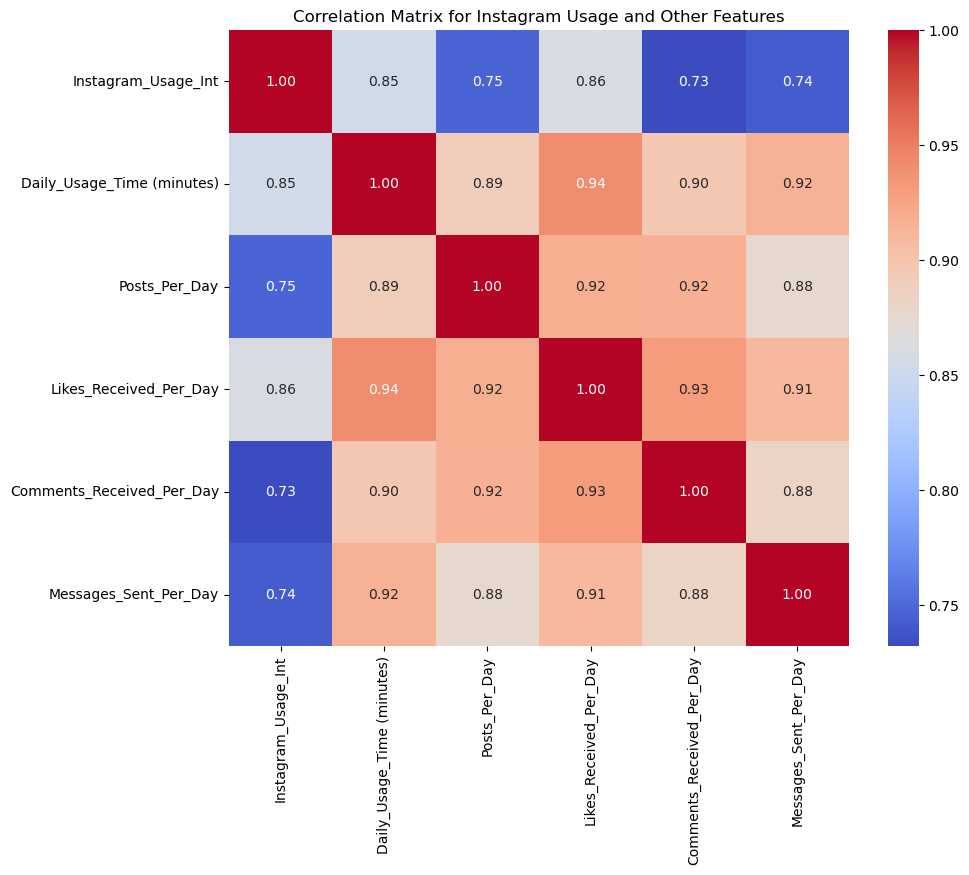

In [75]:
# Convert Instagram usage back to integer for correlation calculation
SM_data['Instagram_Usage_Int'] = SM_data['Platform_Instagram']

relevant_columns = ['Instagram_Usage_Int', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']
correlation_matrix = SM_data[relevant_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Instagram Usage and Other Features')
plt.show()

A correlation of 0.94 between "Likes Received Per Day" and "Daily Usage Time (minutes)" indicates a very strong positive relationship. This suggests that as the amount of time a user spends on social media increases, the number of likes they receive per day also tends to increase significantly

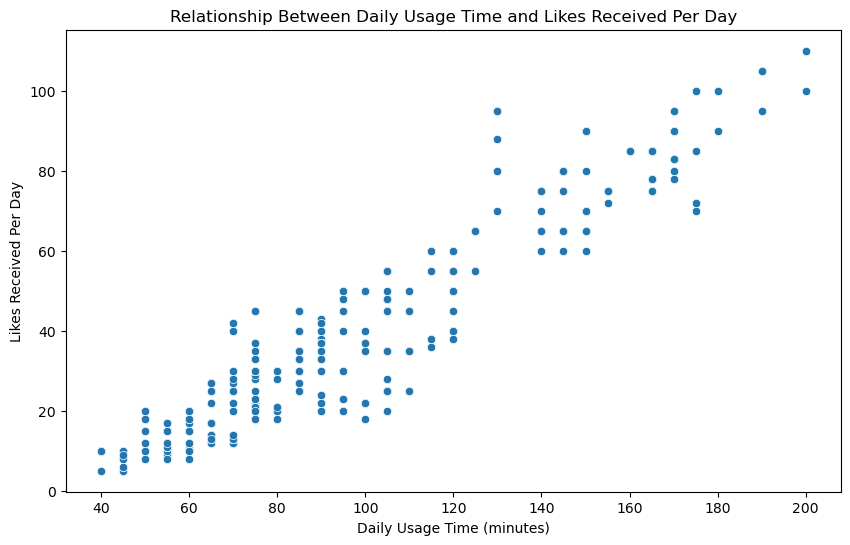

In [77]:
# Visualizing the relationship between "Likes Received Per Day" and "Daily Usage Time (minutes)" 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily_Usage_Time (minutes)', y='Likes_Received_Per_Day', data=SM_data)
plt.title('Relationship Between Daily Usage Time and Likes Received Per Day')
plt.xlabel('Daily Usage Time (minutes)')
plt.ylabel('Likes Received Per Day')
plt.show()

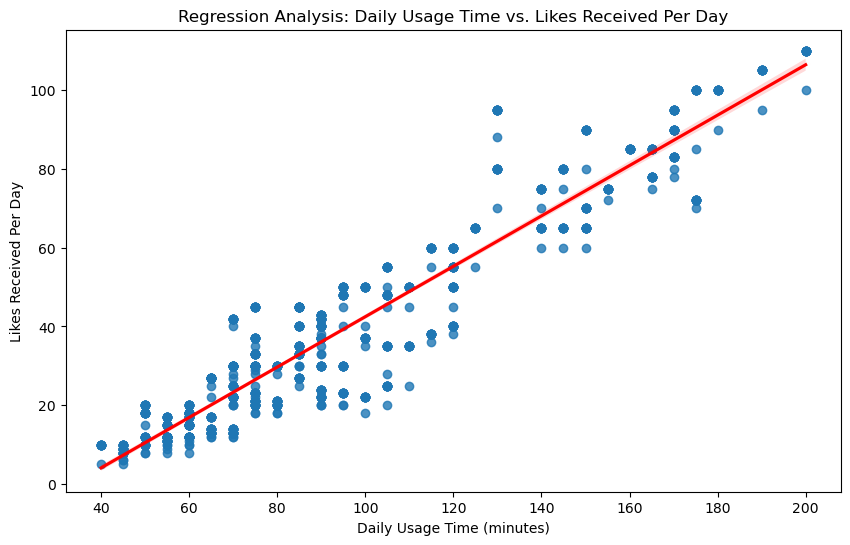

In [78]:
#Linear Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Daily_Usage_Time (minutes)', y='Likes_Received_Per_Day', data=SM_data, line_kws={"color": "red"})
plt.title('Regression Analysis: Daily Usage Time vs. Likes Received Per Day')
plt.xlabel('Daily Usage Time (minutes)')
plt.ylabel('Likes Received Per Day')
plt.show()

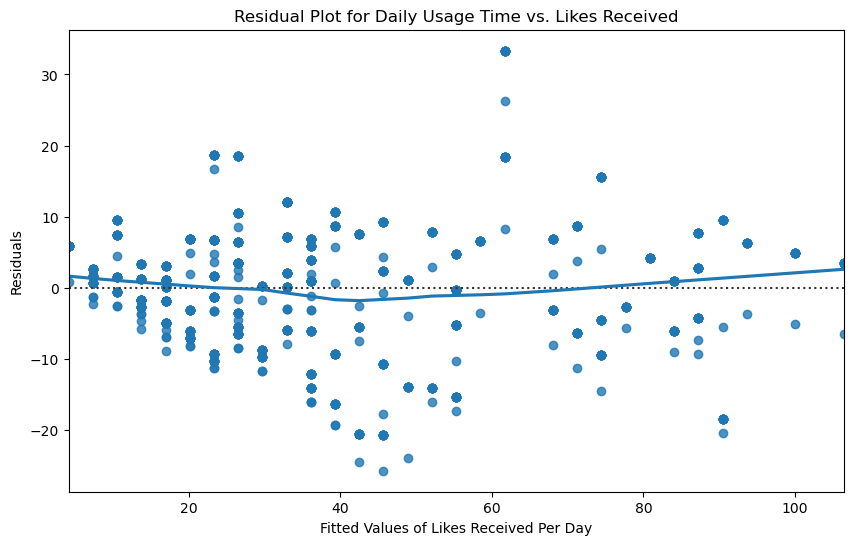

In [79]:
#Residual Plot

X = SM_data['Daily_Usage_Time (minutes)'].values.reshape(-1, 1)
y = SM_data['Likes_Received_Per_Day'].values

# Fit regression model
model = LinearRegression()
model.fit(X, y)

# Predict and calculate residuals
predictions = model.predict(X)
residuals = y - predictions

# Plot residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=predictions, y=residuals,lowess=True)
plt.title('Residual Plot for Daily Usage Time vs. Likes Received')
plt.xlabel('Fitted Values of Likes Received Per Day')
plt.ylabel('Residuals')
plt.show()

In [80]:
#Summary Statistics
usage_likes_summary = SM_data[['Daily_Usage_Time (minutes)', 'Likes_Received_Per_Day']].describe()
print(usage_likes_summary)

       Daily_Usage_Time (minutes)  Likes_Received_Per_Day
count                 1000.000000             1000.000000
mean                    95.950000               39.898000
std                     38.850442               26.393867
min                     40.000000                5.000000
25%                     65.000000               20.000000
50%                     85.000000               33.000000
75%                    120.000000               55.000000
max                    200.000000              110.000000


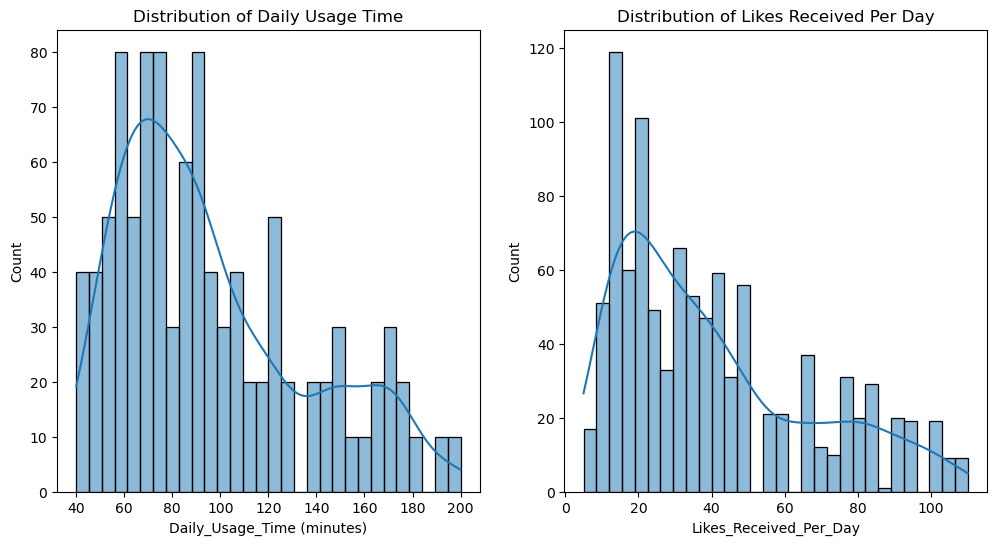

In [81]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(SM_data['Daily_Usage_Time (minutes)'], bins=30, kde=True)
plt.title('Distribution of Daily Usage Time')

plt.subplot(1, 2, 2)
sns.histplot(SM_data['Likes_Received_Per_Day'], bins=30, kde=True)
plt.title('Distribution of Likes Received Per Day')
plt.show()

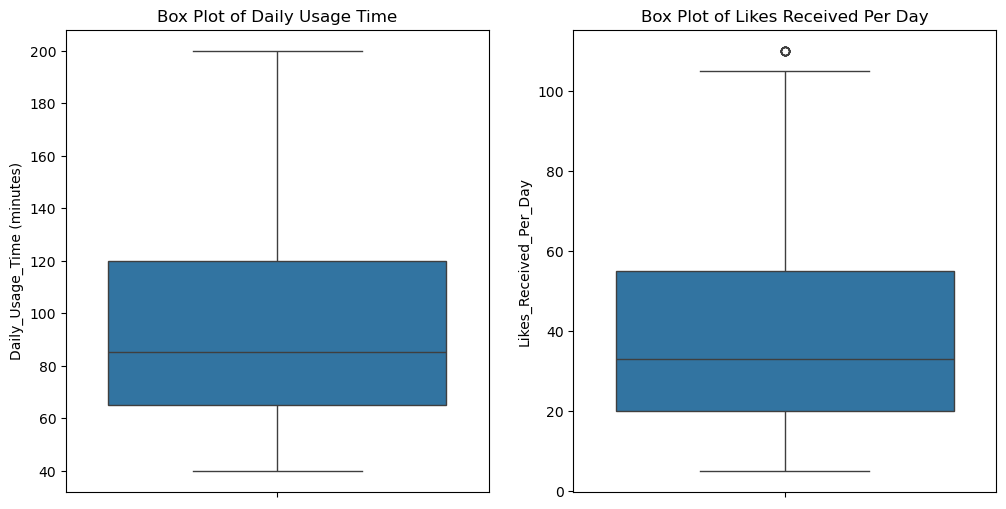

In [82]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=SM_data['Daily_Usage_Time (minutes)'])
plt.title('Box Plot of Daily Usage Time')

plt.subplot(1, 2, 2)
sns.boxplot(y=SM_data['Likes_Received_Per_Day'])
plt.title('Box Plot of Likes Received Per Day')
plt.show()

Increased time on social media is correlated with more likes received, which can create a positive feedback loop, potentially encouraging addictive usage patterns. This dependence on social media for validation may heighten stress and negatively impact mental well-being. It suggests that social media platforms could consider adjusting their algorithms to encourage healthier interaction patterns and implement tools that help users manage their usage to promote digital wellness. Further research is necessary to explore the long-term effects on different demographic groups, which can inform policies aimed at protecting vulnerable users and promoting a balanced relationship with digital platforms.

# Pre-processing and Training Data Development

In [85]:
SM_data.columns

Index(['User_ID', 'Age', 'Gender', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion', 'Emotion_Category',
       'Gender_encoded', 'Emotion_Label', 'Platform_Instagram',
       'Platform_LinkedIn', 'Platform_Snapchat', 'Platform_Telegram',
       'Platform_Twitter', 'Platform_Whatsapp', 'Emotion_Label_Encoded',
       'Instagram_Usage', 'Instagram_Usage_Int'],
      dtype='object')

In [86]:
# Check for categorical variables and their number of unique values

categorical_cols = SM_data.select_dtypes(include=['object', 'category']).columns
Unique_values = SM_data[categorical_cols]
print(Unique_values)

         Gender Dominant_Emotion Emotion_Label         Instagram_Usage
0        Female        Happiness      Positive          Uses Instagram
1          Male            Anger      Negative  Does Not Use Instagram
2    Non-binary          Neutral       Neutral  Does Not Use Instagram
3        Female          Anxiety      Negative          Uses Instagram
4          Male          Boredom      Negative  Does Not Use Instagram
..          ...              ...           ...                     ...
995  Non-binary          Boredom      Negative  Does Not Use Instagram
996      Female          Neutral       Neutral  Does Not Use Instagram
997        Male        Happiness      Positive  Does Not Use Instagram
998  Non-binary            Anger      Negative  Does Not Use Instagram
999      Female          Neutral       Neutral  Does Not Use Instagram

[1000 rows x 4 columns]


In [87]:
# Create dummy variables for categorical features

SM_data_encoded  = pd.get_dummies(SM_data, columns=['Gender', 'Dominant_Emotion', 'Emotion_Label', 'Instagram_Usage'], drop_first=True)
print(SM_data_encoded.head())

   User_ID  Age  Daily_Usage_Time (minutes)  Posts_Per_Day  \
0        1   25                         120              3   
1        2   30                          90              5   
2        3   22                          60              2   
3        4   28                         200              8   
4        5   33                          45              1   

   Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                      45                         10                     12   
1                      20                         25                     30   
2                      15                          5                     20   
3                     100                         30                     50   
4                       5                          2                     10   

   Emotion_Category  Gender_encoded  Platform_Instagram  ...  Gender_Male  \
0                 2               0                True  ...        False  

In [88]:
X = SM_data_encoded.drop(['User_ID', 'Emotion_Label_Encoded'], axis=1)
y = SM_data_encoded['Emotion_Label_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
# Standardize the numeric features
numeric_cols = ['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print(X_train[numeric_cols].head())


          Age  Daily_Usage_Time (minutes)  Posts_Per_Day  \
541 -0.628121                    1.397727       1.425771   
440  0.869953                   -1.325117      -1.241358   
482  1.618989                    0.619771       0.892345   
422  0.370595                   -0.936140      -0.707932   
778  1.369310                   -0.806480      -1.241358   

     Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  
541                1.904468                   1.175500               0.876292  
440               -1.186864                  -1.331799              -1.503550  
482                0.759530                   1.061532               0.281331  
422               -0.881548                  -0.875926              -0.908590  
778               -1.034206                  -0.989895              -1.027582  


In [90]:
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (700, 25)
Test set size: (300, 25)


# Modeling

In [92]:
# Dummy Classifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_accuracy = dummy_clf.score(X_test, y_test)
print("Dummy Classifier Accuracy:", dummy_accuracy)


Dummy Classifier Accuracy: 0.6066666666666667


In [93]:
# Logistic Regression
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 1.0

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        62

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [94]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        62

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [95]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 1.0

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        62

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [96]:
# SVM
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_proba_svm = svm.predict_proba(X_test)

print("Predicted labels:", y_pred_svm)
print("Predicted probabilities:", y_proba_svm)

Predicted labels: [0 0 0 2 0 0 0 2 0 2 0 2 2 0 1 1 0 1 0 2 0 1 0 2 0 0 0 0 1 0 0 0 0 1 2 0 1
 0 0 0 0 1 0 1 1 0 0 0 0 0 2 1 0 0 2 0 0 0 0 0 1 0 0 2 0 1 1 2 2 1 0 0 0 2
 1 0 1 0 0 0 1 2 0 1 1 1 0 0 0 2 0 0 0 1 1 2 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0
 2 0 0 0 1 0 0 0 0 1 1 2 2 0 0 1 2 1 2 1 0 0 0 0 0 0 1 1 1 0 0 0 2 0 0 0 0
 0 0 1 2 0 0 2 1 2 2 2 0 0 1 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 2 0 0 2
 0 0 0 0 0 1 0 0 1 2 1 1 1 2 0 0 0 0 0 2 1 0 1 0 0 0 2 1 2 0 2 0 0 0 1 2 0
 0 0 1 1 0 2 0 2 0 0 2 0 0 2 2 0 1 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0
 2 2 0 2 2 0 0 0 0 2 2 0 1 2 2 2 2 1 0 2 1 1 2 0 0 0 0 0 0 2 2 0 1 0 0 1 0
 0 0 0 0]
Predicted probabilities: [[9.95766824e-01 2.57578368e-03 1.65739189e-03]
 [9.97093373e-01 1.92071940e-03 9.85907890e-04]
 [9.96035192e-01 2.43366238e-03 1.53114573e-03]
 [5.96709962e-03 3.37591217e-03 9.90656988e-01]
 [9.97719211e-01 1.26765852e-03 1.01313058e-03]
 [9.95202924e-01 3.03194470e-03 1.76513143e-03]
 [9.95969915e-01 2.48633749e-03 1.54374758e-03]
 [8.3267091

In [97]:
cv_logistic = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
cv_random_forest = cross_val_score(random_forest, X, y, cv=5, scoring='accuracy')
cv_decision_tree = cross_val_score(decision_tree, X, y, cv=5, scoring='accuracy')
cv_svm = cross_val_score(svm, X, y, cv=5, scoring='accuracy')

(cv_logistic.mean(), cv_random_forest.mean(), cv_decision_tree.mean(), cv_svm.mean())

(1.0, 1.0, 1.0, 0.72)

In [99]:
class_counts = y.value_counts()
print(class_counts)

Emotion_Label_Encoded
0    600
2    200
1    200
Name: count, dtype: int64


In [100]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_svm)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        62

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



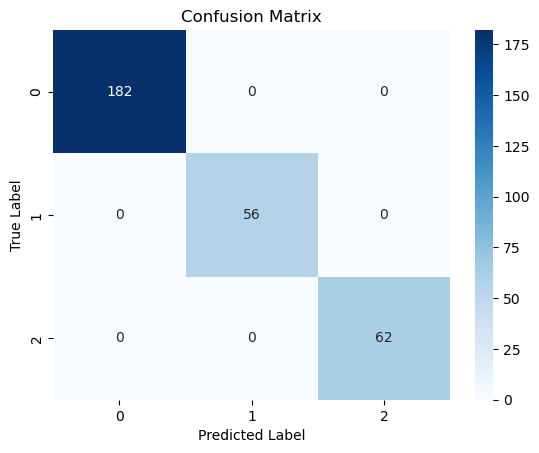

In [101]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [102]:
#Logistic Regression Hyperparameter Tuning
param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'], 
    'max_iter': [100, 200, 300]
}

grid_logreg = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid_logreg, cv=5, scoring='accuracy')
grid_logreg.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_logreg.best_params_)
print("Best score for Logistic Regression:", grid_logreg.best_score_)

Best parameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}
Best score for Logistic Regression: 1.0


In [103]:
# Random Forest Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best score for Random Forest:", grid_rf.best_score_)

Best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best score for Random Forest: 1.0


In [104]:
#Decision Tree Hyperparameter Tuning

param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best score for Decision Tree:", grid_dt.best_score_)


Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for Decision Tree: 1.0


In [105]:
#SVM Hyperparameter Tuning
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

print("Best parameters for SVM:", grid_svm.best_params_)
print("Best score for SVM:", grid_svm.best_score_)

Best parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best score for SVM: 1.0
